# Analysis of Video Game Ratings

By: Dhruv Murthy 

For CISC108 Introduction To Computer Science Fall 2020

**Origin:** This notebook analyses video game rating for different games and across different maturity levels. The data in this notebook was originally collected by Dr. Joe Cox and has the information of over a thousand video games released from 2004 to 2010. The playtime information was collected from crowd-sourced data on "How Long to Beat". More information about this data can be found [here](https://researchportal.port.ac.uk/portal/en/publications/what-makes-a-blockbuster-video-game(a6d848fe-38ae-4584-8c95-a0f735ec9b4c).html). This data was made availabe to me through the [CORGIS COLLECTION](https://think.cs.vt.edu/corgis/json/).

**Importance:** This data can be critical in understanding the future of the gaming industry. With gaming becoming more and more popular, it is essential for developers to understand what times of games are attracting higher ratings and which games people play more. This way, game developers can prioritze making games that will maximize their profits rather than making  games which will not be as profitable.

# Loading the Data

In [7]:
# Load the JSON data with Requests
import requests
reports = requests.get("https://corgis-edu.github.io/corgis/datasets/json/video_games/video_games.json").json()

from pprint import pprint
#Preview first row of data

pprint(reports[0])

{'Features': {'Handheld?': True,
              'Max Players': 1,
              'Multiplatform?': True,
              'Online?': True},
 'Length': {'All PlayStyles': {'Average': 22.716666666666665,
                               'Leisure': 31.9,
                               'Median': 24.483333333333334,
                               'Polled': 57,
                               'Rushed': 14.3},
            'Completionists': {'Average': 29.766666666666666,
                               'Leisure': 35.03333333333333,
                               'Median': 30.0,
                               'Polled': 20,
                               'Rushed': 22.016666666666666},
            'Main + Extras': {'Average': 24.916666666666668,
                              'Leisure': 29.966666666666665,
                              'Median': 25.0,
                              'Polled': 16,
                              'Rushed': 18.333333333333332},
            'Main Story': {'Average': 14.3333333333

# Histogram Analysis

For my histogram, I will analyze the review scores of games rated as E for everyone.

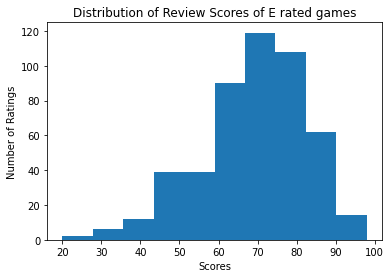

In [2]:
import matplotlib.pyplot as plt
newlist = []
for report in reports:
    if report['Release']['Rating']== 'E':
        newlist.append(report['Metrics']['Review Score'])


plt.hist(newlist)
plt.title("Distribution of Review Scores of E rated games")
plt.xlabel("Scores")
plt.ylabel("Number of Ratings")

plt.show()

My histogram shows the frequency of review scores for games that are rated as "E". Each column shows a particular score range that games could fall between. As shown in this graph, most games have a rating between 60 to 80. There is a smaller amount of games that have a rating from 40 to 60 and 80 to 90. Then, there are some outliers in the the 20 to 40 range.

# Scatter Plot Analysis

For my first additional analysis, I chose to do a scatter plot which compares the ratings of games with an E rating and their respective prices.

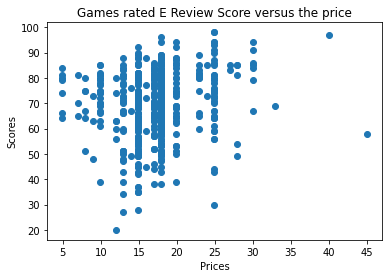

In [3]:
newlist = []
for report in reports:
    if report['Release']['Rating']== 'E':
        newlist.append(report['Metrics']['Review Score'])
        
otherlist = []
for report in reports:
    if report['Release']['Rating']== 'E':
        otherlist.append(report['Metrics']['Used Price'])

plt.scatter(otherlist,newlist)
plt.title("Games rated E Review Score versus the price")
plt.xlabel("Prices")
plt.ylabel("Scores")
plt.show()

The scatter plot shows correlation between prices of the games and review scores of the game. This graph shows that most of these games were between 15 and 25 dollars. Normally, we would think that games with a lower rating would be cheaper and games with a higher rating would be more expensive. However, this graph does not show a clear correlation between price and review scores of the game. Based on this graph, we would conclude that rating of the game does not have an effect on the price of the game.

# Bar Graph Analysis

For my second additional analysis, I chose to do a bar graph which visualizes the time needed to play Super Mario 64 DS for different types of playing styles.

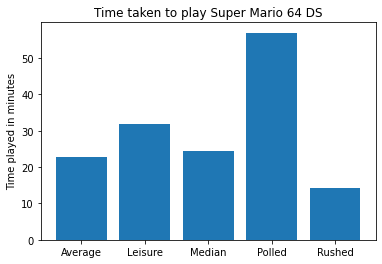

In [5]:
for report in reports:
    if report['Title']== 'Super Mario 64 DS':
        thislist = [report['Length']['All PlayStyles']['Average'],report['Length']['All PlayStyles']['Leisure'],report['Length']['All PlayStyles']['Median'],report['Length']['All PlayStyles']['Polled'],report['Length']['All PlayStyles']['Rushed']]
objects = ('Average', 'Leisure', 'Median', 'Polled', 'Rushed')
plt.bar(objects, thislist)
plt.xticks(objects)
plt.ylabel('Time played in minutes')
plt.title('Time taken to play Super Mario 64 DS')
plt.show()

This bar graph shows the time in minutes needed to play Super Mario 64 DS. People who played for leisure played for slighlty more than 30 minutes. People who were rushed played for slightly less than 20 minutes. People who were polled, played the most by far playing for over 50 minutes. On average, people played for about 25 minutes.

# Mean, Median, SD Analysis

For my third additional analysis, I chose to do a mean, median, and standard deviation analysis for games with a E, M, and T rating.

In [8]:
import statistics
anotherlist = []
for report in reports:
    if report['Release']['Rating']== 'E':
        anotherlist.append(report['Metrics']['Review Score'])
Emean = statistics.mean(anotherlist)
Emedian= statistics.median(anotherlist)
Esd = statistics.stdev(anotherlist)
thislist =[]
for report in reports:
    if report['Release']['Rating']== 'M':
        thislist.append(report['Metrics']['Review Score'])
Mmean = statistics.mean(thislist)
Mmedian= statistics.median(thislist)
Msd = statistics.stdev(thislist)
bootleglist = []
for report in reports:
    if report['Release']['Rating']== 'T':
        bootleglist.append(report['Metrics']['Review Score'])
Tmean = statistics.mean(bootleglist)
Tmedian= statistics.median(bootleglist)
Tsd = statistics.stdev(bootleglist)
print("The mean rating of Games with an E rating is ",Emean)
print("The median rating of Games with an E rating is ",Emedian)
print("The Standard Deviation of Games with an E rating is ",Esd)
print('')
print("The mean rating of Games with a M rating is ",Mmean)
print("The median rating of Games with a M rating is ",Mmedian)
print("The Standard Deviation of Games with a M rating is ",Msd)
print('')
print("The mean rating of Games with a T rating is ",Tmean)
print("The median rating of Games with a T rating is ",Tmedian)
print("The Standard Deviation of Games with a T rating is ",Tsd)

The mean rating of Games with an E rating is  69.17107942973523
The median rating of Games with an E rating is  71
The Standard Deviation of Games with an E rating is  13.378449723182385

The mean rating of Games with a M rating is  67.29083665338645
The median rating of Games with a M rating is  69
The Standard Deviation of Games with a M rating is  12.957433221792469

The mean rating of Games with a T rating is  69.29148936170213
The median rating of Games with a T rating is  71.0
The Standard Deviation of Games with a T rating is  12.463769751261717


In order to do this analysis, I imported statistics and used the mean, median, and SD functions to find those values for games with an E rating, M rating, and T rating respectively. It found that games with an E and T rating had a significantly better rating than games with a M rating at about 69.20. Game with an E and T rating both had a median of 71 while the median for M rated games was 69. The standard deviation was about similar for all three categories between 12 and 13.

# Stakeholder Analysis

Two stakeholders who might be interested in this analysis are:

* Video game developers, who want to know what type of games get the best ratings so they can prioritize those games and be able to maximize profits.
* Parents of children, who might be interested in seeing which games require less playing time so they can buy those games so their children do not play too much games.

These two stakeholders are likely in conflict with eachother. Video game developers would want children to buy more and play more video games so they can make more money. Parents of children would want kids to play less so they can focus on more important things than video games.